# Architectural Basics

## Concepts Used
1. Batch Normalization
2. DropOut
3. Batch Size

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot


from keras.datasets import mnist

from IPython.display import Image

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


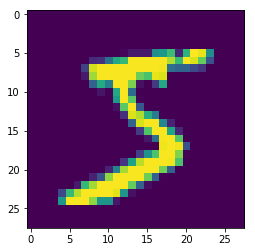

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
def plot_loss_and_accuracy(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  
  plt.rc_context({'figure.facecolor':'white'})
  fig = plt.figure(figsize=(15,5))
  
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, color='red', label='Training loss')
  plt.plot(epochs, val_loss, color='green', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, color='red', label='Training acc')
  plt.plot(epochs, val_acc, color='green', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [0]:
from keras.layers import Activation
model = Sequential()

# Convolution Block 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Transition Block
model.add(MaxPooling2D(pool_size=(2,2))) #12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12
# Convolution Block

model.add(Convolution2D(16, 3, 3, activation='relu')) #10
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2,2))) #5

model.add(Convolution2D(16, 3, 3, activation='relu')) #2
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
__________

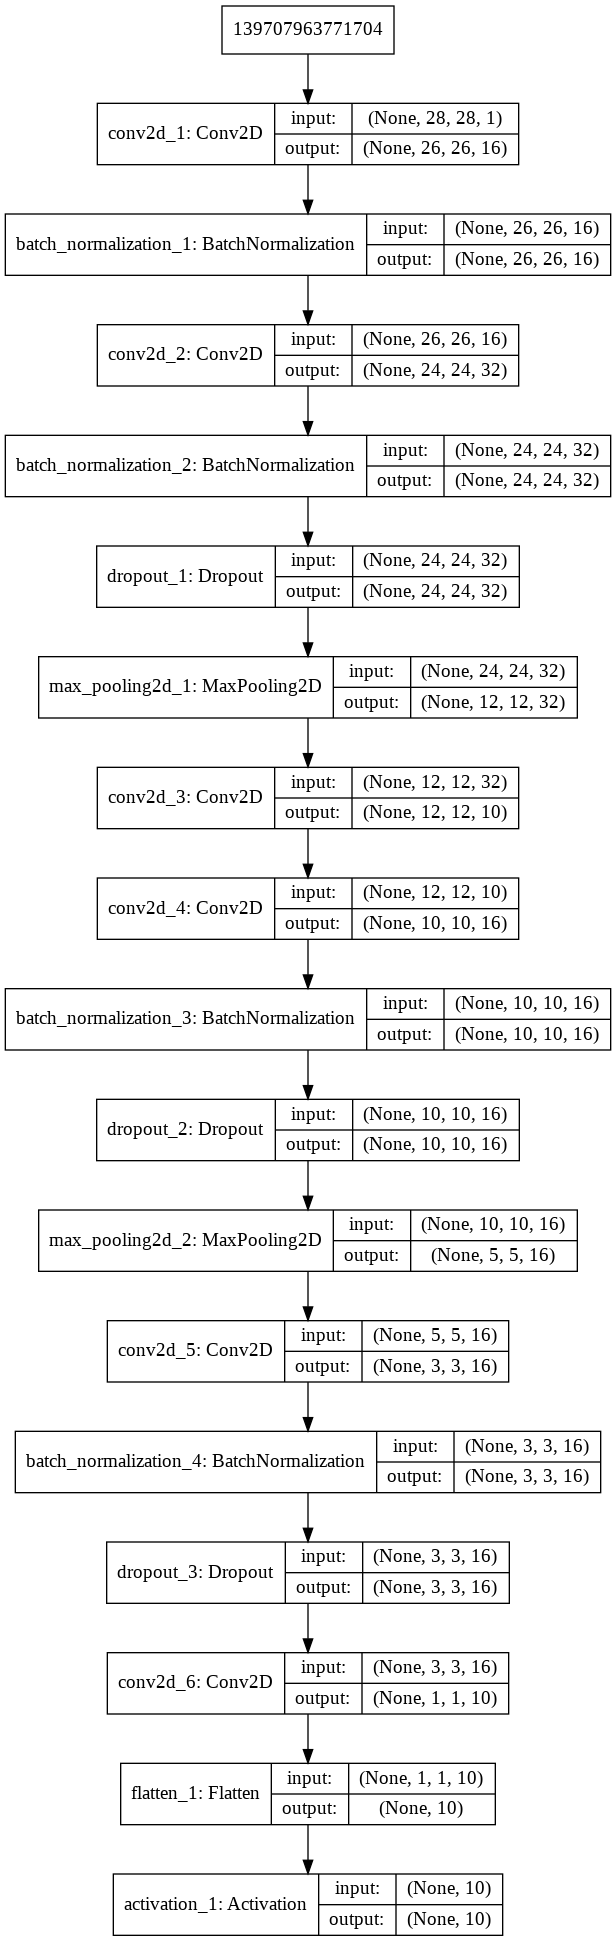

In [0]:
model.summary()


plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.2903 - acc: 0.9106 - val_loss: 0.0766 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0833 - acc: 0.9742 - val_loss: 0.0621 - val_acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0621 - acc: 0.9809 - val_loss: 0.0459 - val_acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0533 - acc: 0.9832 - val_loss: 0.0372 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0409 - val_acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0440 - acc: 0.9857 - val_loss: 0.0386 - val_acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0420 - acc: 0.9865 - val_loss: 0.0314 -

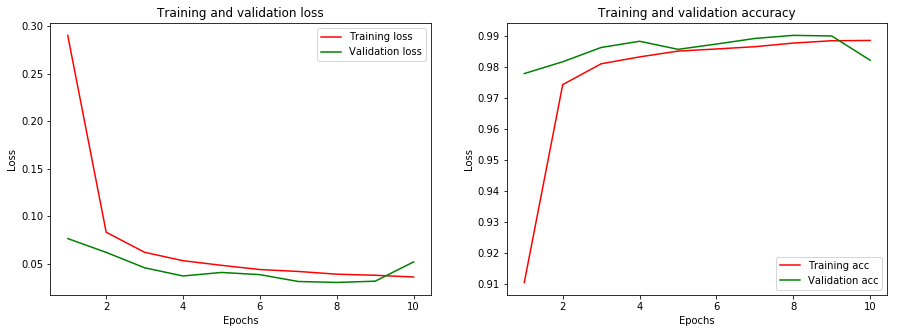

In [0]:
history = model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

plot_loss_and_accuracy(history)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.052037578619318084, 0.9821]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.68047187e-09 9.47450928e-07 6.43490727e-09 3.30589586e-07
  3.73536491e-09 6.51832366e-10 5.75492995e-12 9.99998093e-01
  3.63608310e-11 6.55370684e-07]
 [7.57845060e-04 3.53088915e-01 6.41688168e-01 7.37000846e-07
  5.99758387e-05 5.31248531e-07 4.40216018e-03 2.55398533e-07
  9.57773295e-07 4.11565253e-07]
 [4.28407475e-07 9.99974966e-01 4.22414246e-08 1.01767279e-08
  1.40642180e-06 1.08881991e-07 5.19170555e-07 2.16565786e-05
  1.22873072e-08 8.08279651e-07]
 [9.96488452e-01 5.83377812e-07 2.82717292e-06 5.28971043e-07
  3.47669442e-07 3.18173602e-06 3.45048122e-03 1.04159582e-07
  1.34331356e-06 5.21719594e-05]
 [1.56091762e-09 3.01096662e-07 2.32184133e-10 1.28979979e-10
  9.99987006e-01 2.66809880e-10 1.57685236e-07 2.08465323e-07
  7.92875557e-11 1.22794845e-05]
 [1.98539141e-07 9.99990463e-01 1.97784988e-08 9.88173654e-10
  9.72347493e-07 2.26699659e-09 9.79944232e-08 8.10671099e-06
  1.11613097e-09 5.92886380e-08]
 [9.39057987e-09 9.45987413e-05 9.78829348e-07 2.55816968e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

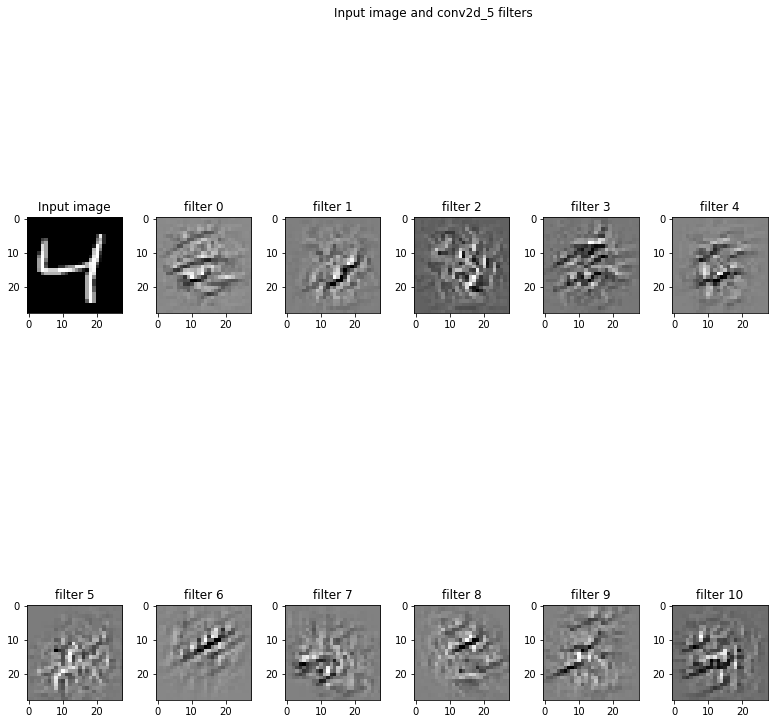

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_5')